In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
tf.__version__

'1.13.1'

In [2]:
mat = np.genfromtxt("data.csv",delimiter=",")
print(np.shape(mat))

(15122, 1026)


In [3]:
# Shuffle rows
np.random.shuffle(mat)
# Split 80/20 train/test
train = mat[:int(0.8*np.shape(mat)[0]),:]
valid = train[int(0.8*np.shape(mat)[0]):]
train = train[:int(0.8*np.shape(mat)[0])]
test = mat[int(0.8*np.shape(mat)[0]):,:]

In [4]:
X_train = train[:,:32*32]
y_train = train[:,32*32:]

X_test = test[:,:32*32]
y_test = test[:,32*32:]

X_valid= valid[:,:32*32]
y_valid = valid[:,32*32:]

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(50, input_shape=[32*32], activation="relu"))
model.add(keras.layers.Dense(10, activation="relu"))
model.add(keras.layers.Dense(10, activation="relu"))
model.add(keras.layers.Dense(2, activation="linear"))

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
model.compile(loss="mse", optimizer="sgd", metrics=["accuracy"])

Instructions for updating:
Use tf.cast instead.


In [12]:
history = model.fit(X_train, y_train, epochs=250) #validation_data=(X_valid, y_valid)

Epoch 1/250
12097/12097 [==============================] - 1s 55us/sample - loss: 0.0169 - acc: 0.9737
Epoch 2/250
12097/12097 [==============================] - 1s 54us/sample - loss: 0.0168 - acc: 0.9736
Epoch 3/250
12097/12097 [==============================] - 1s 49us/sample - loss: 0.0167 - acc: 0.9731
Epoch 4/250
12097/12097 [==============================] - 1s 50us/sample - loss: 0.0166 - acc: 0.9723
Epoch 5/250
12097/12097 [==============================] - 1s 51us/sample - loss: 0.0165 - acc: 0.9735
Epoch 6/250
12097/12097 [==============================] - 1s 49us/sample - loss: 0.0164 - acc: 0.9735
Epoch 7/250
12097/12097 [==============================] - 1s 52us/sample - loss: 0.0163 - acc: 0.9739
Epoch 8/250
12097/12097 [==============================] - 1s 52us/sample - loss: 0.0162 - acc: 0.9738
Epoch 9/250
12097/12097 [==============================] - 1s 55us/sample - loss: 0.0162 - acc: 0.9742
Epoch 10/250
12097/12097 [==============================] - 1s 60us/sampl

(1024,)
(1, 1024)
[[0.66808987 0.70743173]]
Actual : 0.713813859370721, 0.7003354725917263
Predict: 0.6680898666381836, 0.7074317336082458


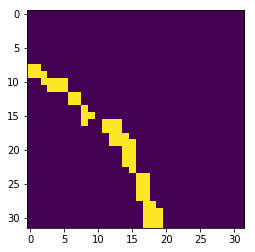

In [20]:
# Let's grab a random row from our test data, visualize, predict, compare
np.random.shuffle(test)
row = test[0]
img = row[:32*32]
print(np.shape(img))
vel = row[32*32:]
img2 = np.reshape(img,(32,32))
plt.imshow(img2)

img = np.reshape(img,(1,1024,))

print(np.shape(img))
pre = model.predict(img)
print(pre)

print(f"Actual : {vel[0]}, {vel[1]}")
print(f"Predict: {pre[0][0]}, {pre[0][1]}")

In [14]:
# save our model
model.save('model.model')

In [15]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                51250     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 22        
Total params: 51,892
Trainable params: 51,892
Non-trainable params: 0
_________________________________________________________________
None
